# Watch Trapezoidal Series of Kc
The aim is to infere the seasons from data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

TRAPEZOIDAL_FILE = r"C:\Users\fedes\OneDrive - UNIPA\Crop_Coefficient\Dataset\trapezoidal_us_arm.csv"
KC_FILE = "../data/us_arm_fede/data/postprocessed/kc_filtered.pickle"

array([<AxesSubplot:xlabel='Day'>], dtype=object)

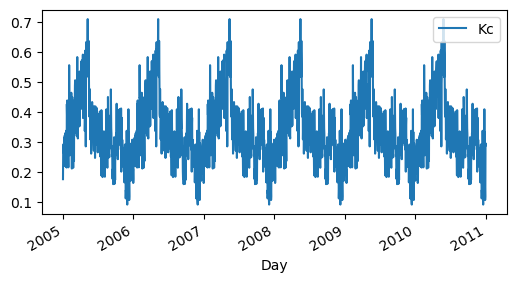

In [2]:
df = pd.read_pickle(KC_FILE)
allen = pd.read_csv(TRAPEZOIDAL_FILE, sep=';', decimal=',', infer_datetime_format=True, parse_dates=True, dayfirst=True, index_col=0)

df.plot(subplots=True, figsize=(6, 3))

In [3]:
df['Kc'].shape

(2172,)

In [4]:
allen

,US_ARM_Allen1,US_ARM_Allen2
Date,,
2024-01-01,0.44,0.56
2024-01-02,0.46,0.57
2024-01-03,0.47,0.58
2024-01-04,0.49,0.60
2024-01-05,0.50,0.61
...,...,...
2024-12-27,0.36,0.49
2024-12-28,0.38,0.51
2024-12-29,0.39,0.52


In [5]:
allen1 = allen.groupby('US_ARM_Allen1')
allen2 = allen.groupby('US_ARM_Allen2')

max_value1 = allen['US_ARM_Allen1'].max()
min_value1 = allen['US_ARM_Allen1'].min()
max_value2 = allen['US_ARM_Allen2'].max()
min_value2 = allen['US_ARM_Allen2'].min()
print(f"Max: {max_value1}, Min: {min_value1}")
print(f"Max: {max_value2}, Min: {min_value2}")

allen['Season1'] = None


for name, group in allen1:
    start = group.index[0]
    end = group.index[-1]
    if max_value1 - 1e-2 <= name <= max_value1:
        season = 'High'
        print(f"{season} Kc season from {start} to {end}: {name}")
    elif min_value1 <= name <= min_value1 + 1e-2:
        season = 'Low'
        print(f"{season} Kc season from {start} to {end}: {name}")
    else:
        season = 'Mid'
    allen.loc[group.index, 'Season1'] = season

allen['Season2'] = None    
 
for name, group in allen2:
    start = group.index[0]
    end = group.index[-1]
    if max_value2 - 1e-2 <= name <= max_value2:
        season = 'High'
        print(f"{season} Kc season from {start} to {end}: {name}")
    elif min_value2 <= name <= min_value2 + 1e-2:
        season = 'Low'
        print(f"{season} Kc season from {start} to {end}: {name}")
    else:
        season = 'Mid'
    allen.loc[group.index, 'Season2'] = season

Max: 1.15, Min: 0.25
Max: 1.15, Min: 0.4
Low Kc season from 2024-05-15 00:00:00 to 2024-12-20 00:00:00: 0.25
High Kc season from 2024-02-15 00:00:00 to 2024-04-15 00:00:00: 1.15
Low Kc season from 2024-05-15 00:00:00 to 2024-12-20 00:00:00: 0.4
Low Kc season from 2024-12-21 00:00:00 to 2024-12-21 00:00:00: 0.41
High Kc season from 2024-02-14 00:00:00 to 2024-02-14 00:00:00: 1.14
High Kc season from 2024-02-15 00:00:00 to 2024-04-15 00:00:00: 1.15


In [6]:
allen

,US_ARM_Allen1,US_ARM_Allen2,Season1,Season2
Date,,,,
2024-01-01,0.44,0.56,Mid,Mid
2024-01-02,0.46,0.57,Mid,Mid
2024-01-03,0.47,0.58,Mid,Mid
2024-01-04,0.49,0.60,Mid,Mid
2024-01-05,0.50,0.61,Mid,Mid
...,...,...,...,...
2024-12-27,0.36,0.49,Mid,Mid
2024-12-28,0.38,0.51,Mid,Mid
2024-12-29,0.39,0.52,Mid,Mid


In [7]:
df = df.reset_index()
allen = allen.reset_index()

# Create a new column 'month_day' in both dataframes that contains the month and day only
allen['month_day'] = allen['Date'].dt.strftime('%m-%d')
df['month_day'] = df['Day'].dt.strftime('%m-%d')


In [8]:
# Merge the dataframes on 'month_day'
final_df = pd.merge(df, allen, on='month_day')
final_df = final_df.sort_values('Day').drop(['month_day', 'Date'], axis=1)

<AxesSubplot:xlabel='Day'>

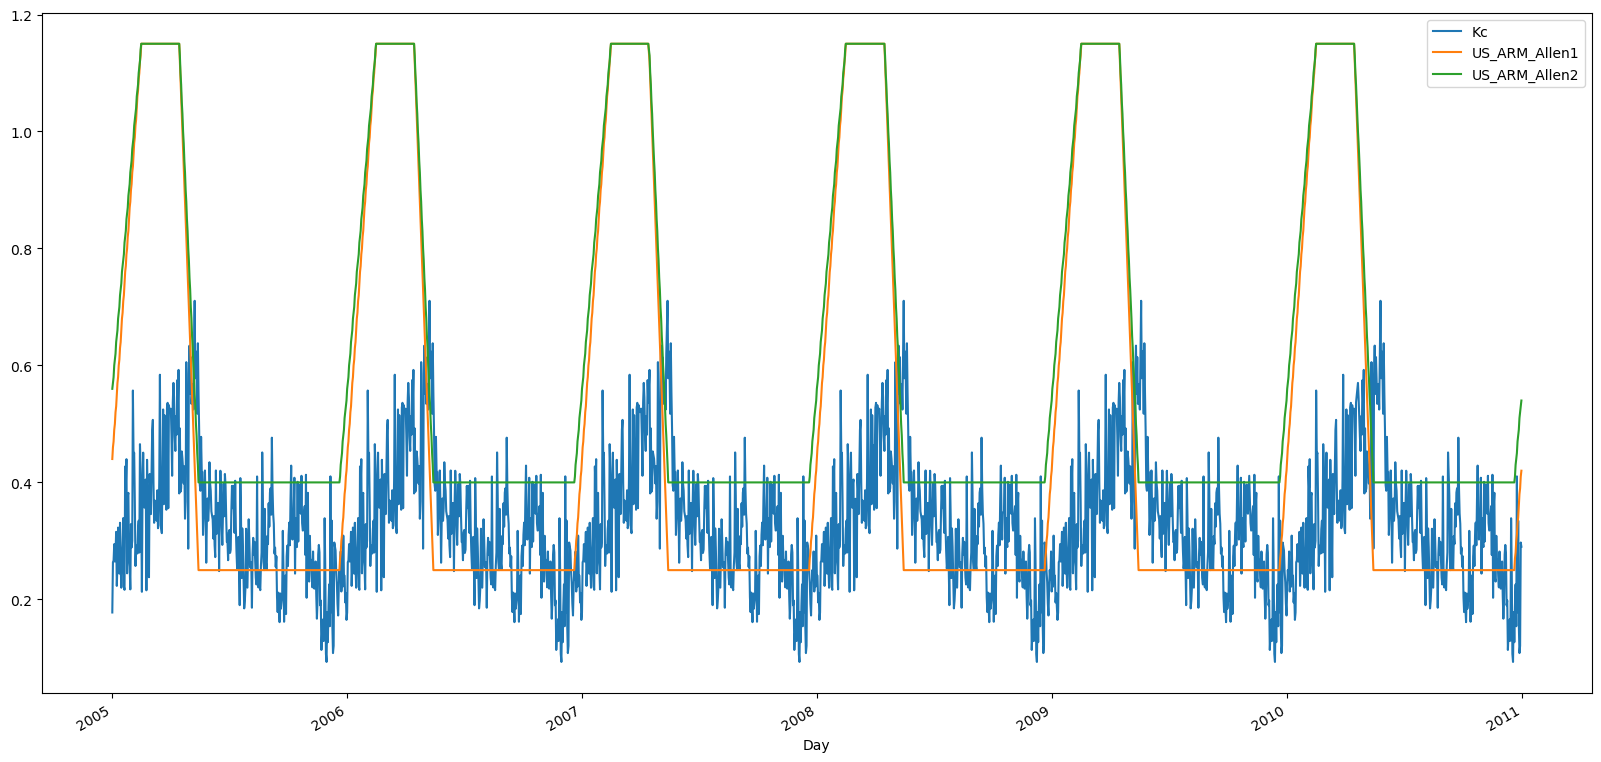

In [9]:
final_df.plot(x='Day', y=['Kc', 'US_ARM_Allen1', 'US_ARM_Allen2'], figsize=(20, 10))

In [10]:
final_df

,Day,Kc,Source,US_ARM_Allen1,US_ARM_Allen2,Season1,Season2
0,2005-01-01,0.177589,Measured,0.44,0.56,Mid,Mid
6,2005-01-02,0.263521,Predicted,0.46,0.57,Mid,Mid
12,2005-01-03,0.266489,Predicted,0.47,0.58,Mid,Mid
18,2005-01-04,0.294460,Predicted,0.49,0.60,Mid,Mid
24,2005-01-05,0.264671,Predicted,0.50,0.61,Mid,Mid
...,...,...,...,...,...,...,...
2146,2010-12-27,0.157045,Measured,0.36,0.49,Mid,Mid
2152,2010-12-28,0.108169,Measured,0.38,0.51,Mid,Mid
2158,2010-12-29,0.120581,Measured,0.39,0.52,Mid,Mid
2164,2010-12-30,0.297208,Measured,0.41,0.53,Mid,Mid


In [11]:
final_df['year'] = final_df['Day'].dt.year
final_df['Kc_trapezoidal'] = np.nan
final_df['Error'] = np.nan
groups = final_df.groupby(['year', 'Season1'], group_keys=False)
for name, group in groups:
    print(name)
    print(len(group))

(2005, 'High')
60
(2005, 'Low')
220
(2005, 'Mid')
85
(2006, 'High')
60
(2006, 'Low')
220
(2006, 'Mid')
85
(2007, 'High')
58
(2007, 'Low')
220
(2007, 'Mid')
82
(2008, 'High')
58
(2008, 'Low')
218
(2008, 'Mid')
85
(2009, 'High')
60
(2009, 'Low')
217
(2009, 'Mid')
83
(2010, 'High')
60
(2010, 'Low')
218
(2010, 'Mid')
82


In [27]:
def make_trapezoidal(group):
    season = group['Season1'].iloc[0]
    if season != 'Mid':
        group['Kc_trapezoidal'] = group['Kc'].mean()
        group['Error'] = group['Kc'].std()        
    return group


trapezoidal_df = groups.apply(make_trapezoidal)
# Fill Mid-season values with linear interpolation
mid_values = trapezoidal_df['Kc_trapezoidal'].interpolate(method='linear')
trapezoidal_df

,Day,Kc,Source,US_ARM_Allen1,US_ARM_Allen2,Season1,Season2,year,Kc_trapezoidal,Error
0,2005-01-01,0.177589,Measured,0.44,0.56,Mid,Mid,2005,NaN,NaN
6,2005-01-02,0.263521,Predicted,0.46,0.57,Mid,Mid,2005,NaN,NaN
12,2005-01-03,0.266489,Predicted,0.47,0.58,Mid,Mid,2005,NaN,NaN
18,2005-01-04,0.294460,Predicted,0.49,0.60,Mid,Mid,2005,NaN,NaN
24,2005-01-05,0.264671,Predicted,0.50,0.61,Mid,Mid,2005,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2146,2010-12-27,0.157045,Measured,0.36,0.49,Mid,Mid,2010,NaN,NaN
2152,2010-12-28,0.108169,Measured,0.38,0.51,Mid,Mid,2010,NaN,NaN
2158,2010-12-29,0.120581,Measured,0.39,0.52,Mid,Mid,2010,NaN,NaN
2164,2010-12-30,0.297208,Measured,0.41,0.53,Mid,Mid,2010,NaN,NaN


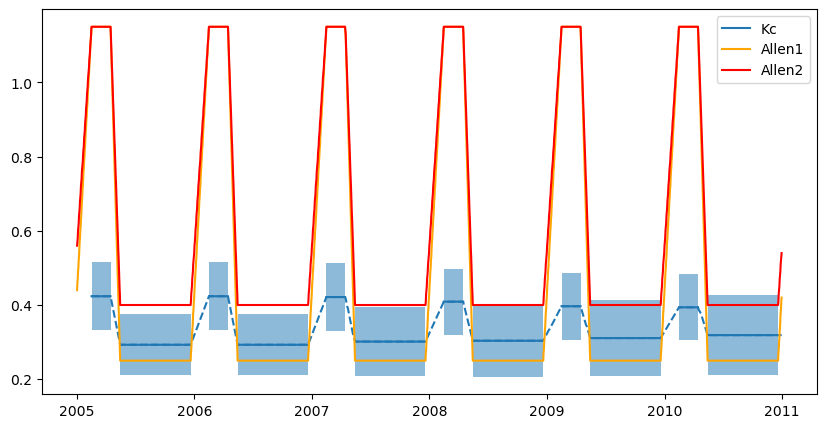

In [38]:
# df_to_plot = trapezoidal_df[trapezoidal_df['year'] == 2005]
df_to_plot = trapezoidal_df

fig, ax = plt.subplots(figsize=(10, 5))

x = df_to_plot['Day']
y = df_to_plot['Kc_trapezoidal']
y_mids = mid_values
y_allen1 = df_to_plot['US_ARM_Allen1']
y_allen2 = df_to_plot['US_ARM_Allen2']
error = df_to_plot['Error']

ax.plot(x, y, label='Kc', c='#1f77b4')
ax.plot(x, y_mids, linestyle='--', c='#1f77b4')
ax.plot(x, y_allen1, label='Allen1', c='orange')
ax.plot(x, y_allen2, label='Allen2', c='red')
ax.fill_between(x, y-error, y+error, alpha=0.5)

plt.legend()
plt.show()